In [1]:
import tables, h5py
import numpy as np
import scipy.stats as stats
import os
import matplotlib as mpl

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
def figsize(scale,scale_height=None):
    fig_width_pt = 360.0                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    if scale_height == None or type(scale_height) not in (int,float):
        scale_height = golden_mean
    height_scale = scale_height
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*height_scale              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

In [4]:
import seaborn as sns
cpal = [(0,113/255.0,187/255.0),(89/255.0,186/255.0,115/255.0)]
sns.set_palette(sns.color_palette(cpal))

/home/jkager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


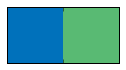

In [27]:
sns.palplot(sns.color_palette())

In [5]:
data_path = "/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/"
files = sorted([os.path.join(data_path, f) for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))])

In [6]:
files

['/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_00000-00999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_01000-01999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_02000-02999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_03000-03999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_04000-04999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_05000-05999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11069_00000-00999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11069_01000-01999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11069_02000-02999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11069_03000-03999.h5',
 '/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11069_04000-04999.h5',
 '/data/user/jkager/NN_Reco/trai

In [7]:
openedfiles = [tables.open_file(f) for f in files]

In [7]:
openedfiles[0]

File(filename=/data/user/jkager/NN_Reco/training_data_20x10x60/training_data/11029_00000-00999.h5, title='Events for training the NN', mode='r', root_uep='/', filters=Filters(complevel=9, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Events for training the NN'
/charge (EArray(970452, 20, 10, 60, 1), shuffle, zlib(9)) 'Charge Distribution'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 20, 10, 60, 1)
/reco_vals (Table(970452,), shuffle, zlib(9)) ''
  description := {
  "azimuth": Float64Col(shape=(), dflt=0.0, pos=0),
  "zenith": Float64Col(shape=(), dflt=0.0, pos=1),
  "muex": Float64Col(shape=(), dflt=0.0, pos=2),
  "ow": Float64Col(shape=(), dflt=0.0, pos=3),
  "depositedE": Float64Col(shape=(), dflt=0.0, pos=4),
  "energy": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1365,)
/time (EArray(970452, 20, 10, 60, 1), shuffle, zlib(9

In [8]:
f=h5py.File(files[0], 'r')

In [9]:
input_data=f["time"]

In [10]:
input_data[0].shape

(20, 10, 60, 1)

In [9]:
openedfiles[0].root.time[0].shape

(20, 10, 60, 1)

In [10]:
f["reco_vals"][0:5,"zenith"]

array([ 1.81848697,  2.2818552 ,  2.0892834 ,  2.21499595,  3.00450981])

In [11]:
openedfiles[0].root.reco_vals[0:5]["zenith"]

array([ 1.81848697,  2.2818552 ,  2.0892834 ,  2.21499595,  3.00450981])

# visualize input datasets #
- how are the energies disrtibuted inside files and across files (plot every of the 13 files)
- how are angles distributed?

## Energy ##

In [8]:
energies0 = openedfiles[0].root.reco_vals[:]["energy"]
sorted_energies0 = np.sort(energies0)

In [9]:
energies={'11029' : map(lambda x: x.root.reco_vals[:]["energy"], filter(lambda f: '11029' in f.filename, openedfiles)),
          '11069' : map(lambda x: x.root.reco_vals[:]["energy"], filter(lambda f: '11069' in f.filename, openedfiles))}
energies['11029-fn'] = [f.filename.split('/')[-1] for f in filter(lambda f: '11029' in f.filename, openedfiles)]
energies['11069-fn'] = [f.filename.split('/')[-1] for f in filter(lambda f: '11069' in f.filename, openedfiles)]

In [10]:
sorted_energies={'11029' : map(np.sort, energies['11029']),
                 '11069' : map(np.sort, energies['11069'])}

In [10]:
[x.shape for x in sorted_energies['11029']+sorted_energies['11069']]

[(970452,),
 (982552,),
 (973666,),
 (974232,),
 (945329,),
 (258321,),
 (207254,),
 (209640,),
 (209797,),
 (207050,),
 (205701,),
 (198759,),
 (53438,)]

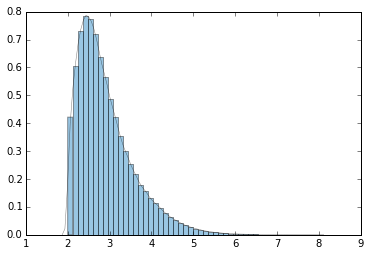

In [66]:
plt.gcf()
plt.xlim((1,9))
plt.hist(np.log10(energies0),50,alpha=0.4,normed=True,stacked=False)
sns.kdeplot(np.log10(energies0),color="k",alpha=0.5,linewidth=0.5)

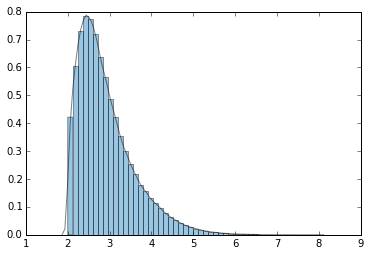

In [64]:
plt.gcf()
plt.xlim((1,9))
plt.hist(np.log10(energies0),50,alpha=0.4,normed=True,stacked=True)
sns.kdeplot(np.log10(energies0),color="k",alpha=0.5)

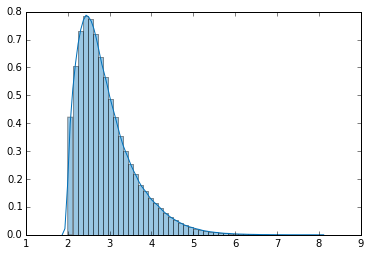

In [41]:
plt.gcf()
sns.distplot(np.log10(energies0))
plt.show()

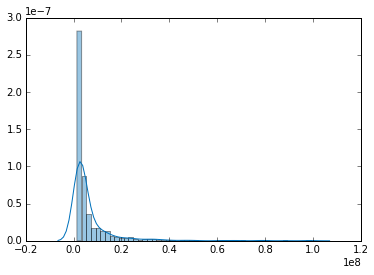

In [14]:
sns.distplot(sorted_energies['11029'][4][-1000:])

### plots for latex thesis

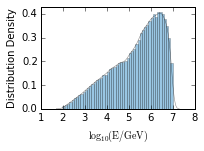

In [72]:
plt.clf()
fig = plt.figure(figsize=figsize(0.55,0.75))
fig.subplots_adjust(bottom=0.21,right=0.95,left=0.17)
energ = np.log10(energies['11069'][0])
axis = fig.add_subplot(111)
plt.ylim(0,0.43)
axis.axes.yaxis.set_ticks([0.0+i*0.1 for i in range(5)])
axis.hist(energ,50,alpha=0.4,normed=True,stacked=True,linewidth=0.5)
sns.kdeplot(energ,color="k",alpha=0.5,linewidth=0.5)
plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
plt.ylabel("Distribution Density")
#savefig('11069_firstfile')

In [40]:
plt.clf()
fig = plt.figure(figsize=figsize(1.0,0.7))
fig.subplots_adjust(bottom=0.16,right=0.94)
energ = energies['11029'][0]
axis = fig.add_subplot(111)
sns.distplot(np.log10(energ),ax=axis)
plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
plt.ylabel("Distribution density")
savefig('11029_firstfile')

0
1


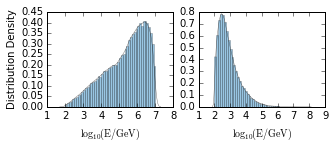

In [73]:
plt.clf()
fig = plt.figure(figsize=figsize(1.0,0.3))
fig.subplots_adjust(top=0.95,bottom=0.07)
xl=(1.0,9.0)
yl=(0.0,0.45)
for i, energ in enumerate(map(np.log10,(energies['11069'][0],energies['11029'][0]))):
    axis = fig.add_subplot(121+i)
#    plt.xlim(*xl)
#    plt.ylim(*yl)
    axis.hist(energ,50,alpha=0.4,normed=True,stacked=True,linewidth=0.5)
    sns.kdeplot(energ,color="k",alpha=0.5,linewidth=0.5)
    plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
    if i == 0:
        plt.ylabel("Distribution Density")
    print i

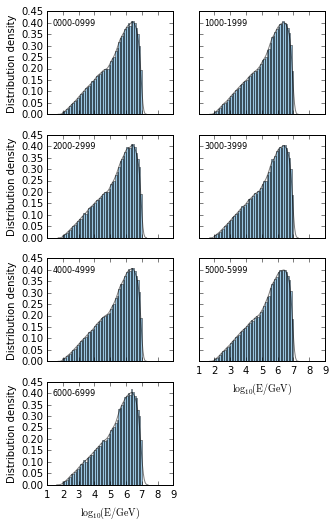

In [61]:
#high energy files (7 of them)
plt.clf()
fig = plt.figure(figsize=figsize(1.0,1.5))
fig.subplots_adjust(top=0.95,bottom=0.07)

for i, energ in enumerate(map(np.log10, energies['11069'])):
    axis = fig.add_subplot(421+i)
    plt.xlim((1,9))
    axis.annotate('{}000-{}999'.format(i,i), xy=(0.05, 0.87), xycoords='axes fraction',fontsize=8.0)
    axis.hist(energ,50,alpha=0.4,normed=True,stacked=True)
    sns.kdeplot(energ,color="k",alpha=0.5)
    if i in (5,6):
        plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
    else:
        axis.axes.xaxis.set_ticklabels([])
    if i in (0,2,4,6):
        plt.ylabel("Distribution density") #sets it on the current axis
    else:
        axis.axes.yaxis.set_ticklabels([])

plt.show()
#savefig("11069_energies_gridplot")

In [24]:
sns.distplot?

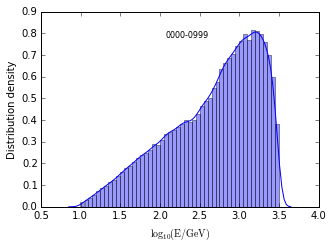

In [37]:
#low energy files (6 of them)
plt.clf()
fig = plt.figure(figsize=figsize(1.0))
fig.subplots_adjust(top=0.95,bottom=0.07)
energ = energies['11069'][0]
axis = fig.add_subplot(111)
axis.annotate('{}000-{}999'.format(0,0), xy=(0.45, 0.87), xycoords='axes fraction',fontsize=8.0)
a=sns.distplot(0.5*np.log10(energ),ax=axis)
plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
plt.ylabel("Distribution density") #sets it on the current axis

plt.show()

In [41]:
print a.get_xlim()
print axis.get_xlim()

(0.5, 4.0)
(0.5, 4.0)


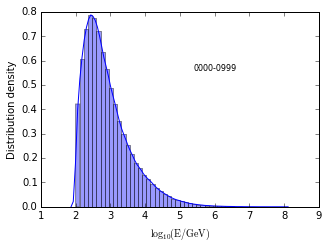

In [45]:
#low energy files (6 of them)
plt.clf()
fig = plt.figure(figsize=figsize(1.0))
fig.subplots_adjust(top=0.95,bottom=0.07)
energ = energies['11029'][0]
axis = fig.add_subplot(111)
axis.annotate('{}000-{}999'.format(0,0), xy=(0.55, 0.7), xycoords='axes fraction',fontsize=8.0)
sns.distplot(np.log10(energ),ax=axis)
plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
plt.ylabel("Distribution density") #sets it on the current axis

plt.show()

In [ ]:
#combined energy files (7 of them)
plt.clf()
fig = plt.figure(figsize=figsize(1.0,1.5))
fig.subplots_adjust(top=0.95,bottom=0.07)
for i, low, high in enumerate(zip(energies['11069']+[None],energies['11069']):
    axis = fig.add_subplot(421+i)
    axis.annotate('{}000-{}999'.format(i,i), xy=(0.45, 0.87), xycoords='axes fraction',fontsize=8.0)
    if low:
      sns.distplot(np.log10(low),ax=axis)
    sns.distplot(np.log10(high),ax=axis)
    if i in (5,6):
        plt.xlabel(r'$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
    else:
        axis.axes.xaxis.set_ticklabels([])
    if i in (0,2,4,6):
        plt.ylabel("Distribution density") #sets it on the current axis
    else:
        axis.axes.yaxis.set_ticklabels([])

#plt.show()
savefig("all_energies_gridplot")

## Zenith ##

In [15]:
zeniths={'11029' : map(lambda x: x.root.reco_vals[:]["zenith"], filter(lambda f: '11029' in f.filename, openedfiles)),
         '11069' : map(lambda x: x.root.reco_vals[:]["zenith"], filter(lambda f: '11069' in f.filename, openedfiles))}

In [16]:
zeniths['11029-fn'] = [f.filename.split('/')[-1] for f in filter(lambda f: '11029' in f.filename, openedfiles)]
zeniths['11069-fn'] = [f.filename.split('/')[-1] for f in filter(lambda f: '11069' in f.filename, openedfiles)]

In [27]:
plt.clf()
#sns.distplot(zeniths['11069'][0],kde_kws={'alpha':0.1})
#sns.distplot(zeniths['11029'][0],kde_kws={'alpha':0.1})
plt.figure()
#sns.distplot(np.cos(zeniths['11029'][0]),kde_kws={'alpha':0.1})
#sns.distplot(np.cos(zeniths['11069'][0]),kde_kws={'alpha':0.1})

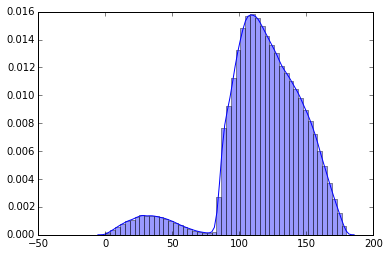

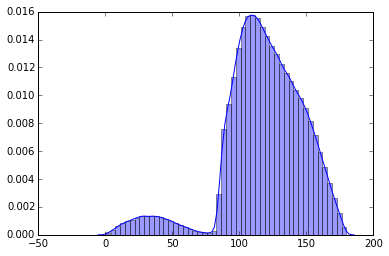

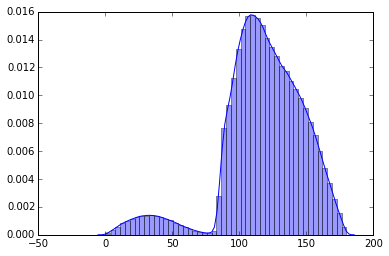

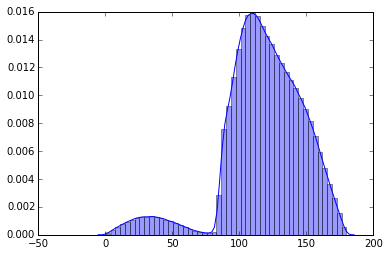

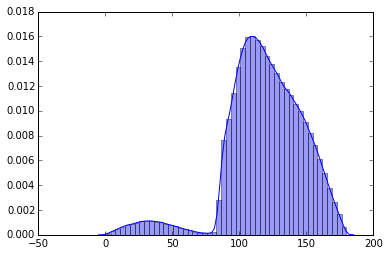

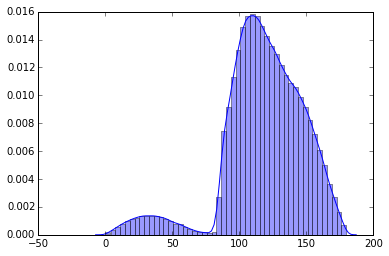

In [9]:
zlist = []
for i, zeniths_in_file in enumerate(zeniths['11029']):
    zlist.extend(zeniths_in_file)
    plt.figure()
    sns.distplot(zeniths_in_file * 180 / np.pi,label=zeniths['11029-fn'][i])

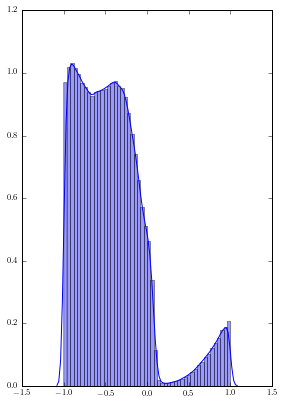

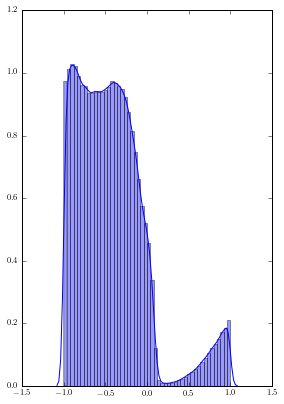

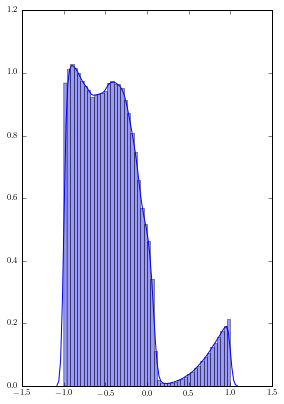

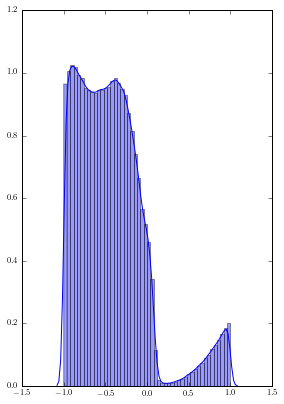

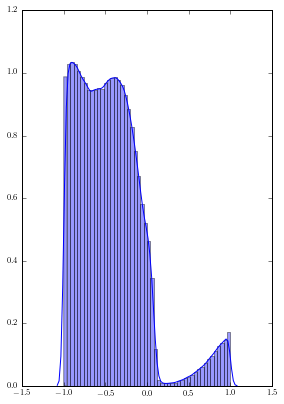

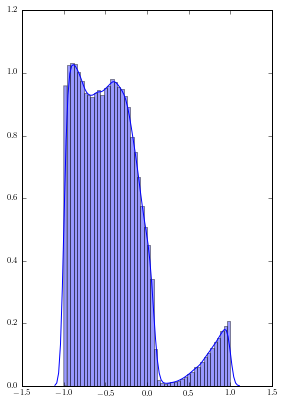

In [35]:
for i, zeniths_in_file in enumerate(zeniths['11029']):
    plt.figure()
    sns.distplot(np.cos(zeniths_in_file),label=zeniths['11029-fn'][i])

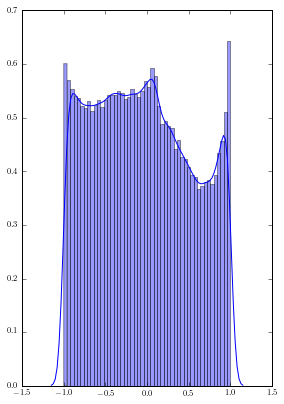

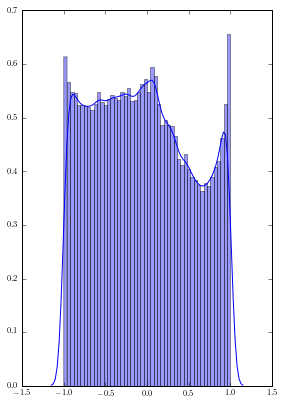

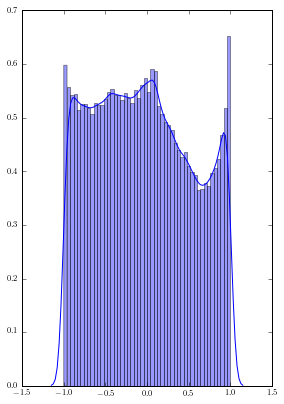

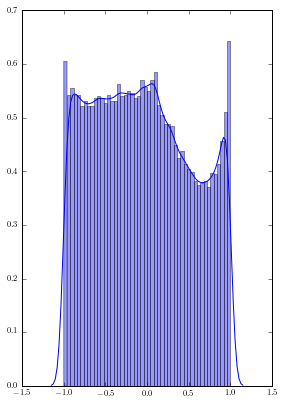

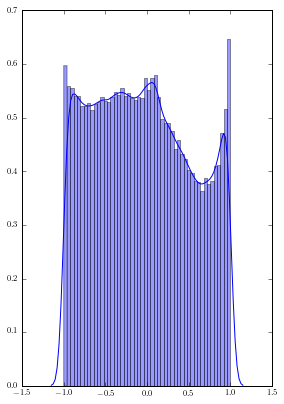

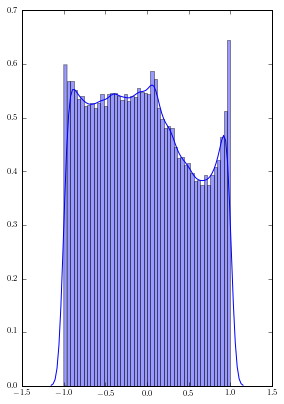

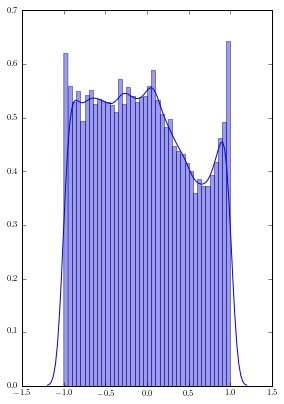

In [36]:
for i, zeniths_in_file in enumerate(zeniths['11069']):
    plt.figure()
    sns.distplot(np.cos(zeniths_in_file),label=zeniths['11069-fn'][i])

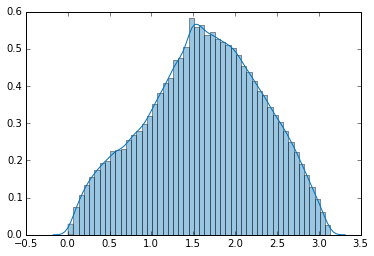

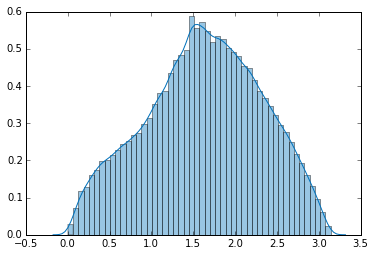

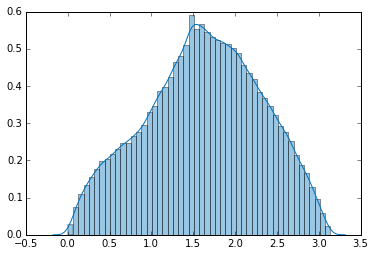

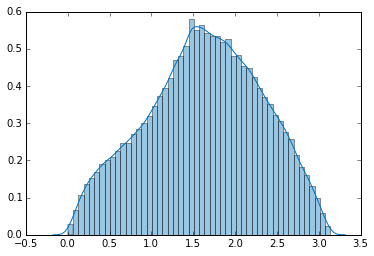

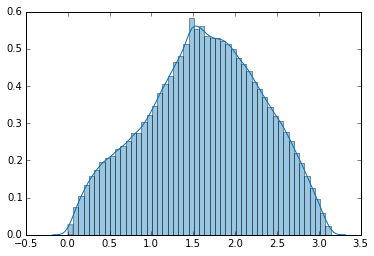

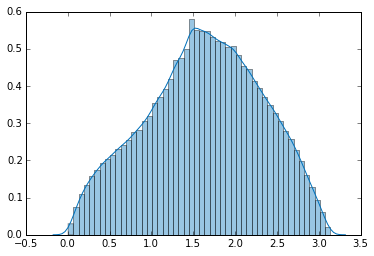

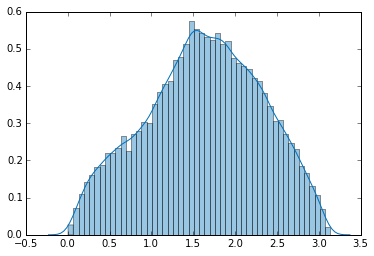

In [19]:
for i, zeniths_in_file in enumerate(zeniths['11069']):
    plt.figure()
    sns.distplot(zeniths_in_file,label=zeniths['11069-fn'][i])

In [30]:
(zlist > np.pi/2).sum() / float(zlist.shape[0])

0.54146940437691959

In [74]:
a=[range(i) for i in range(3,7)]

In [75]:
a

[[0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5]]

In [78]:
np.concatenate(a)

array([0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5])